In [26]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [27]:
df = pd.read_csv('data/raw.csv')

Show Top 5 Records.

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [29]:
df.shape

(1000, 8)

2.2 DataSet information
    
   - gender : sex of students -> (male/female)
   - race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
   - Parental level of education : parents final education ->(bachelor's degree, some college, master degree, associate's degree, high school)
   - lunch : having lunch before test(standard or free/reduced)
   - test preparation course : complete or not complete before test
   - math score
   - reading score
   - writing score

3. Data Checks to perform
   - check missing values
   - check Duplicates
   - check data type
   - check the number of unique value of each column
   - check statistics of data set
   - check various categories present in the different categorical column 

3.1 Checking Missing Value.

In [30]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no  missing values in the data set

3.2 Check Duplicates

In [31]:
df.duplicated().sum()

np.int64(0)

There are no duplicates value in the data set

3.3 Check data types

In [32]:
# Check Null and DataTypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique value of each columns

In [33]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of data set

In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:-

- From above description of umerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.20;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading met higher =17

3.7 Exploring Data

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.7 Exploring Data

In [40]:
print("categories in 'gender' variacle: ", end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variacle: ", end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variacle: ", end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variacle: ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variacle: ", end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variacle:  ['female' 'male']
categories in 'race_ethnicity' variacle:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variacle:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variacle:  ['standard' 'free/reduced']
categories in 'test preparation course' variacle:  ['none' 'completed']


In [41]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df [feature].dtype == 'O']

# print columns
print('we have {} numerical feature: {}'.format(len(numeric_features),numeric_features))
print('\n We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 3 numerical feature: ['math score', 'reading score', 'writing score']

 We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Score" and "Average"

In [43]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,toal score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


In [44]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [45]:
reading_less_20 = df[df['reading score']<= 20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From above values we get students have performed the worst in maths
- Best performance in reading section


4. Exploring Data(Visulization)

4.1 Visualise average score distribution to make some conclusion.
- histogram
- kernel Distribution Function (KDE)

4.1.1 Histogram & KDE


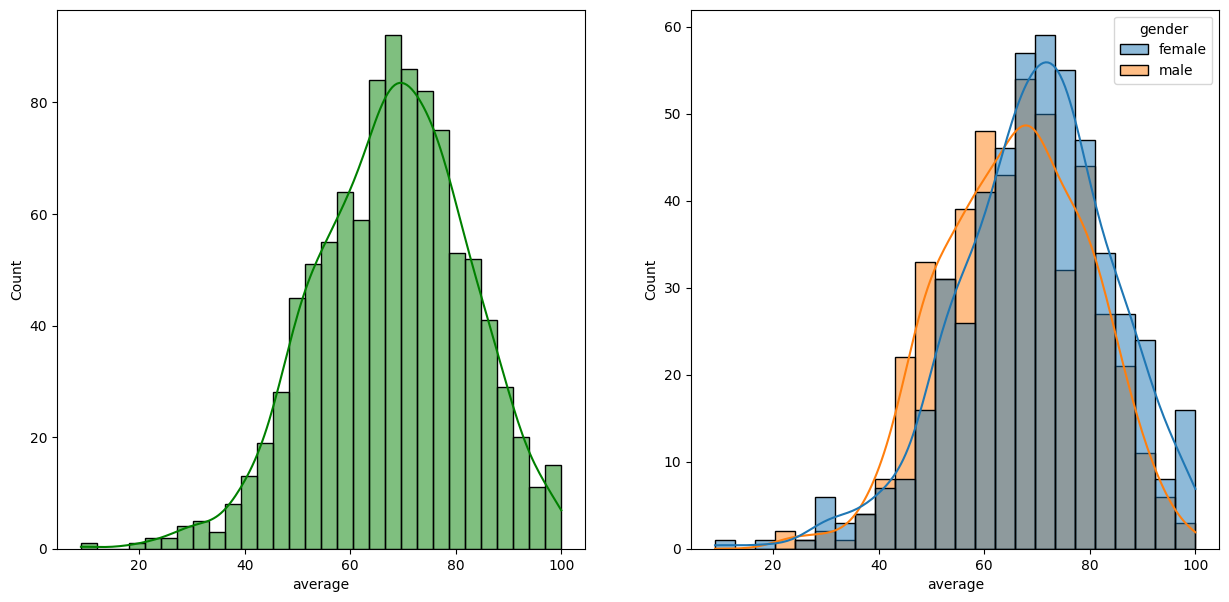

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True,hue='gender')
plt.show()

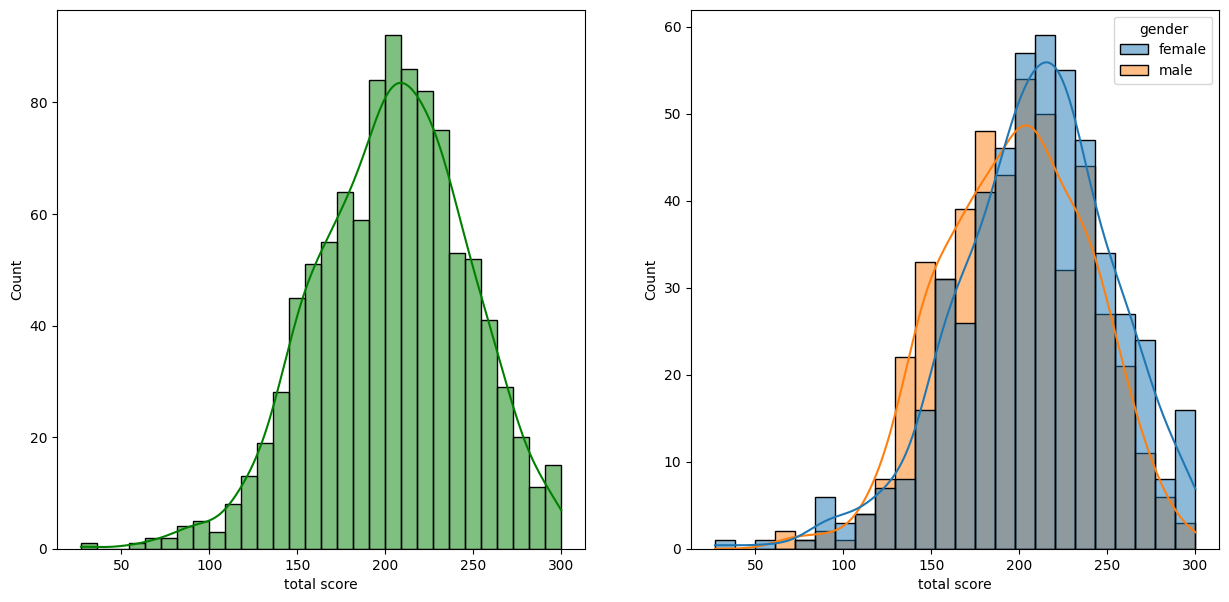

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True,hue='gender')
plt.show()

Insight
- Female students tend to perform well then male students

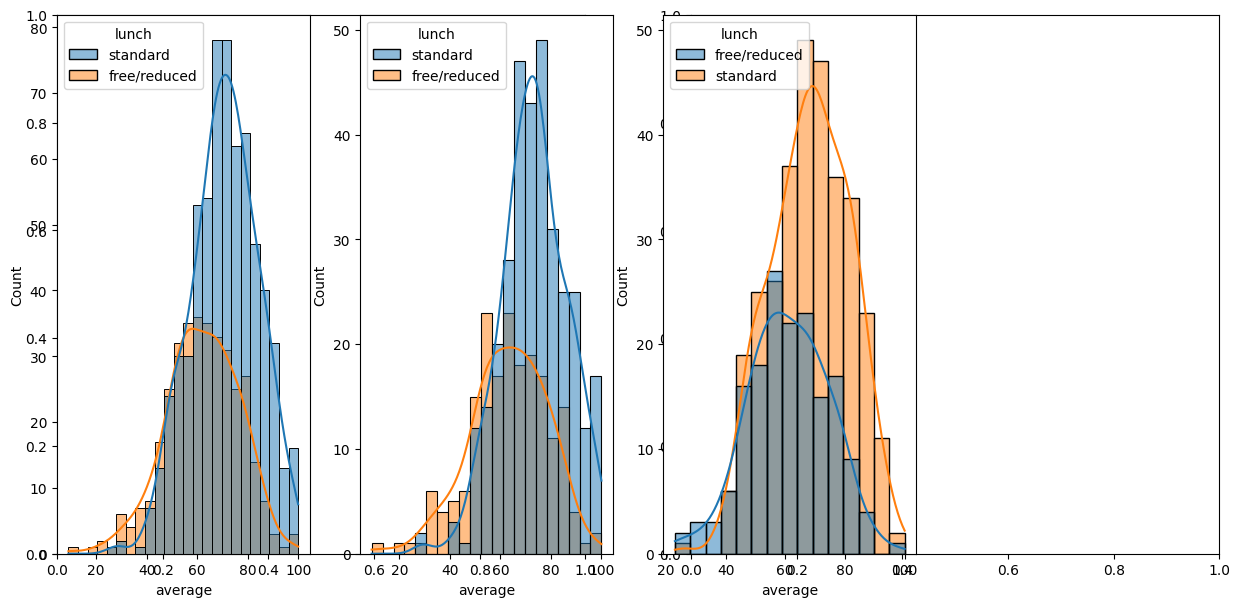

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insight
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

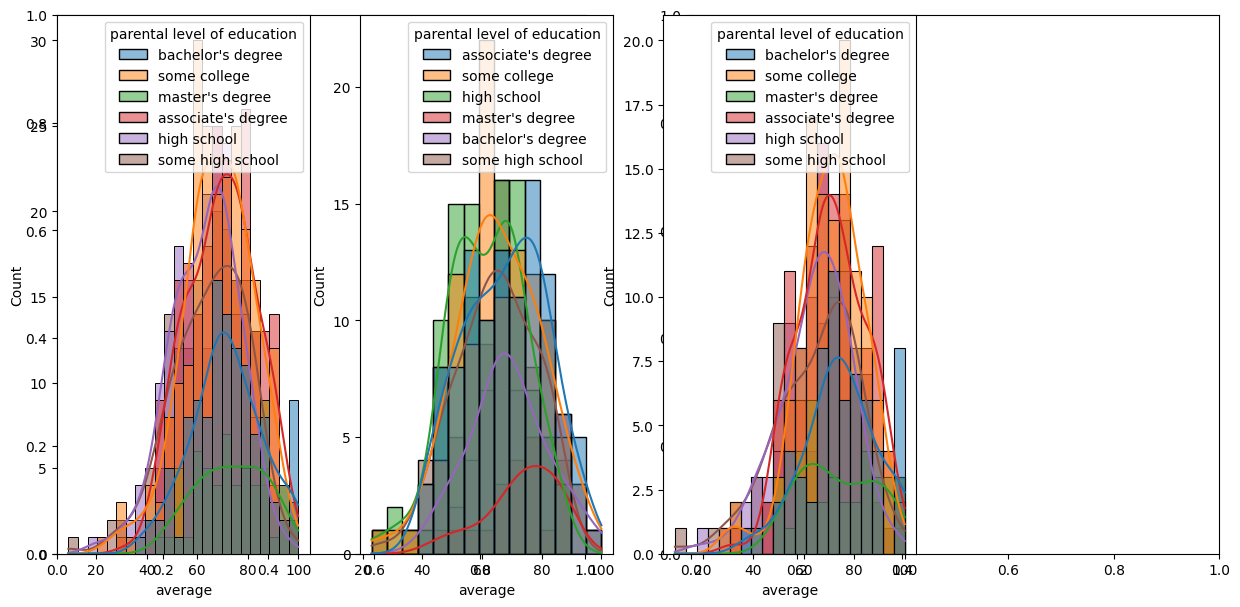

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()